#**Voice Gender Recognition**

**M.Zohaib Afzaal  F22607027**

**Arham Mahmood  F22607014**

**Umar Aurangzeb   F22607034**


In [ ]:
pip install librosa scikit-learn pandas numpy


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("primaryobjects/voicegender")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/voicegender


In [ ]:


# Construct the full path to the CSV file
csv_file_path = f"{path}/voice.csv"

# Load the dataset
df = pd.read_csv(csv_file_path)

# Preview the first few rows
print("First 5 rows of the dataset:")
print(df.head())

# Get information about the dataset
print("\nDataset Info:")
df.info()

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Get basic statistical summary
print("\nDataset Description:")
print(df.describe())

# Check the distribution of the target variable 'label'
print("\nDistribution of the target variable 'label':")
print(df['label'].value_counts())

First 5 rows of the dataset:
   meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  ...  0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  ...  0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  ...  0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  ...  0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  ...  0.135120  0.106398  0.016931   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  label  
0  0

In [ ]:


# Use LabelEncoder to convert 'male' and 'female' to numerical labels
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

# Display the mapping (optional)
print("\nLabel encoding mapping:")
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

# Verify the change
print("\nFirst 5 rows with encoded labels:")
print(df.head())



Label encoding mapping:
{'female': np.int64(0), 'male': np.int64(1)}

First 5 rows with encoded labels:
   meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  ...  0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  ...  0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  ...  0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  ...  0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  ...  0.135120  0.106398  0.016931   


In [ ]:


# Separate features (X) and target (y)
X = df.drop('label', axis=1) # Features are all columns except 'label'
y = df['label']             # Target is the 'label' column

print("\nFeatures (X) shape:", X.shape)
print("Target (y) shape:", y.shape)

# Preview the first few rows of features and target
print("\nFirst 5 rows of Features (X):")
print(X.head())
print("\nFirst 5 rows of Target (y):")
print(y.head())


Features (X) shape: (3168, 20)
Target (y) shape: (3168,)

First 5 rows of Features (X):
   meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm      mode  centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  0.000000  0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  0.000000  0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  0.000000  0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  0.083878  0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  0.104261  0.135120  0.106398

In [ ]:


# Initialize StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_scaled = scaler.fit_transform(X)

# Convert the scaled features back to a DataFrame (optional, but good for inspection)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print("\nScaled Features (X_scaled) shape:", X_scaled.shape)
print("\nFirst 5 rows of Scaled Features (X_scaled):")
print(X_scaled.head())


Scaled Features (X_scaled) shape: (3168, 20)

First 5 rows of Scaled Features (X_scaled):
   meanfreq        sd    median       Q25       Q75       IQR      skew  \
0 -4.049248  0.427355 -4.224901 -2.576102 -5.693607 -0.214778  2.293306   
1 -3.841053  0.611669 -3.999293 -2.486885 -5.588987 -0.258485  4.548056   
2 -3.463066  1.603848 -4.095851 -2.706986 -3.928699  0.909326  6.513656   
3 -0.992157  0.899998 -0.759454 -0.901418 -0.711205  0.632690 -0.449858   
4 -1.530640  1.322561 -1.676948 -1.268395 -0.792029  1.005588 -0.480911   

       kurt    sp.ent       sfm      mode  centroid   meanfun    minfun  \
0  1.762946 -0.039083  0.471575 -2.141210 -4.049248 -1.812038 -1.097998   
1  4.433008 -0.065236  0.594431 -2.141210 -3.841053 -1.079594 -1.091533   
2  7.326207 -1.083730  0.398261 -2.141210 -3.463066 -1.365368 -1.100397   
3 -0.240099  1.516383  1.797340 -1.054576 -0.992157 -1.666966 -0.988934   
4 -0.238940  1.708336  2.114740 -0.790514 -1.530640 -1.127233 -1.034015   

     ma

In [ ]:


# Split the dataset into training and testing sets
# stratify=y ensures that the train and test splits have the same proportion of target classes as the input dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print("\nX_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Define the model architecture
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)), # Input layer with 128 neurons and ReLU activation
    Dropout(0.5),                                               # Dropout layer to prevent overfitting
    Dense(64, activation='relu'),                                 # Hidden layer with 64 neurons and ReLU activation
    Dropout(0.5),                                               # Another Dropout layer
    Dense(1, activation='sigmoid')                              # Output layer with 1 neuron and Sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer='adam',                 # Adam optimizer is a good default choice
              loss='binary_crossentropy',     # Binary crossentropy is suitable for binary classification
              metrics=['accuracy'])           # We want to monitor accuracy during training

# Print the model summary
model.summary()


X_train shape: (2534, 20)
X_test shape: (634, 20)
y_train shape: (2534,)
y_test shape: (634,)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         2,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,009 (43.00 KB)

 Trainable params: 11,009 (43.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.6957 - loss: 0.5740 - val_accuracy: 0.9191 - val_loss: 0.2334
Epoch 2/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9195 - loss: 0.2430 - val_accuracy: 0.9684 - val_loss: 0.1182
Epoch 3/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9456 - loss: 0.1626 - val_accuracy: 0.9724 - val_loss: 0.0973
Epoch 4/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9519 - loss: 0.1374 - val_accuracy: 0.9763 - val_loss: 0.0879
Epoch 5/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9670 - loss: 0.1065 - val_accuracy: 0.9763 - val_loss: 0.0883
Epoch 6/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9680 - loss: 0.0981 - val_accuracy: 0.9763 - val_loss: 0.0842
Epoch 7/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9713 - loss: 0.0880 - val_accuracy: 0.9763 - val_loss: 0.0775
Epoch 8/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9681 - loss: 0.0829 - val_accuracy: 0.9763 - 

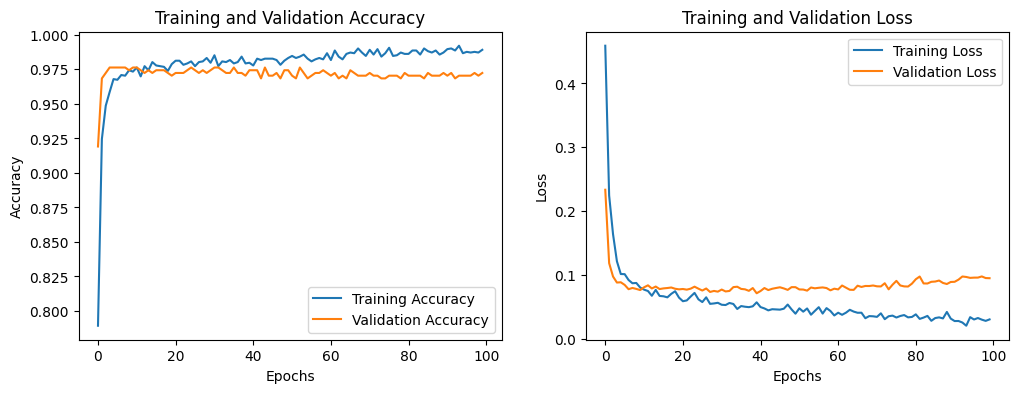

In [ ]:


# Train the model
history = model.fit(X_train, y_train,
                    epochs=100,         # Number of training epochs
                    batch_size=32,      # Number of samples per gradient update
                    validation_split=0.2, # Fraction of the training data to be used as validation data
                    verbose=1)          # Display progress bar during training

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f"\nTest Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Plot training and validation accuracy and loss
history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:


# Make predictions on the test set
y_pred_proba = model.predict(X_test)

# Convert probabilities to binary predictions (0 or 1)
# Threshold is typically 0.5 for binary classification
y_pred = (y_pred_proba > 0.5).astype("int32")

# Display the first few actual and predicted values
print("\nFirst 10 Actual vs. Predicted values:")
for i in range(10):
    print(f"Actual: {y_test.iloc[i]}, Predicted: {y_pred[i][0]}")

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step

First 10 Actual vs. Predicted values:
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 1
Actual: 0, Predicted: 0
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 1


In [ ]:


# Function to make a prediction on a single voice sample
def predict_single_voice(model, scaler, label_encoder, voice_features):
    # Ensure the input features are a numpy array and have the correct shape (1, n_features)
    voice_features = np.array(voice_features).reshape(1, -1)

    # Scale the input features using the same scaler used for training
    scaled_features = scaler.transform(voice_features)

    # Make a prediction using the trained model
    prediction_proba = model.predict(scaled_features)

    # Get the binary prediction (0 or 1)
    prediction = (prediction_proba > 0.5).astype("int32")[0][0]

    # Decode the numerical prediction back to the original label ('male' or 'female')
    predicted_label = label_encoder.inverse_transform([prediction])[0]

    # Return the predicted label and the probability
    return predicted_label, prediction_proba[0][0]


sample_index = 100

# Get the features of the sample from the original scaled test set
sample_features_scaled = X_test.iloc[sample_index]

# Get the true label for this sample from the test set
true_label_encoded = y_test.iloc[sample_index]

# Decode the true label back to the original label ('male' or 'female')
true_label = label_encoder.inverse_transform([true_label_encoded])[0]

print(f"\nPredicting for sample at index {sample_index}...")
print(f"True Label: {true_label}")


# To use the function as defined, let's get the original unscaled features for the sample
sample_features_original = X.iloc[y_test.index[sample_index]]

# Make prediction
predicted_label, predicted_proba = predict_single_voice(model, scaler, label_encoder, sample_features_original)

print(f"Predicted Label: {predicted_label}")
print(f"Prediction Probability (for the positive class, e.g., female): {predicted_proba:.4f}")





Predicting for sample at index 100...
True Label: male
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
Predicted Label: male
Prediction Probability (for the positive class, e.g., female): 1.0000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
